In [1]:
# import package
from bayes_opt import BayesianOptimization
from bayes_opt.observer import JSONLogger # for saving 
from bayes_opt.event import Events # for saving
from bayes_opt.util import load_logs # for loading


# project specific
import numpy as np
import matplotlib.pyplot as plt
import os
#import fitpatterns_autolab_simple as fitpatterns
import fitpatterns_opt_drift as fitpatterns
import itertools
import plotting_functions as plotting
import load_models as models
import plotting_functions as plotting

### parameter settings
# set data_id = 3 and N = 0 in set_parameter_prob() under fitpatterns_opt_drift.py

In [2]:
# Figure settings
def set_figure(SMALL_SIZE,MEDIUM_SIZE):
    #left = 0.125  # the left side of the subplots of the figure
    #right = 0.9   # the right side of the subplots of the figure
    #bottom = 0.2  # the bottom of the subplots of the figure
    #top = 0.9     # the top of the subplots of the figure
    #wspace = 0.5  # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
    #hspace = 0.5  # the amount of height reserved for space between subplots,
                  # expressed as a fraction of the average axis height
    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIGGER_SIZE = 16
    plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
    #colors = ['red','k','grey','silver','lightcoral','maroon','coral','peachpuff','b']
    return plt

def simulateData(primacys,betas_rec,betas,gammas):
    num = len(gammas)
    acc = np.zeros(num)
    forward = np.zeros(num)
    contiguity = np.zeros(num)
    crp = []
    spc = []
    pfr = []
    recalls = []
    for i in range(num):    
        N, ll, lag_examine, data_id = fitpatterns.set_parameter_prob()
        CMR_sp,acc[i]  = fitpatterns.obj_func_subj(betas[i],betas_rec[i],gammas[i],0,param['phi_d'],param['epsilon_d'],param['k'],primacys[i])
        CMR_crp = fitpatterns.get_crp(CMR_sp,4,ll)
        CMR_spc,CMR_pfr = fitpatterns.get_spc_pfr(CMR_sp,ll)
        data_spc, data_pfr, data_crp = fitpatterns.load_patterns(data_id)
        forward[i] = np.sum(CMR_crp[5:9])-np.sum(CMR_crp[0:4])
        contiguity[i] = np.sum(CMR_crp[0:4])
        crp.append(CMR_crp)
        spc.append(CMR_spc)
        pfr.append(CMR_pfr)
        recalls.append(CMR_sp)
    return acc, forward, contiguity, crp, spc, pfr, recalls  
# parameters
# load parameters
N, ll, lag_examine, data_id = fitpatterns.set_parameter_prob()

# load model fit
optimizer = models.load_vanilla()  
load_logs(optimizer, logs=["./output/logs0930_fitCMRprob_PEERS_Behav_poi02.json"])
print(optimizer.max)
param = optimizer.max['params']



{'params': {'gamma_fc': 0.6488777709348337, 'beta_enc': 0.7431104709045802, 'epsilon_d': 4.603761740163928, 'phi_d': 0.5124731134601372, 'beta_rec': 0.30638627416914394, 'phi_s': 2.9511010136314266, 'k': 5.091921857309055}, 'target': -0.2075393532576159}


### Simulate a population of participants that deviate from optimal policy

12.729166666666666


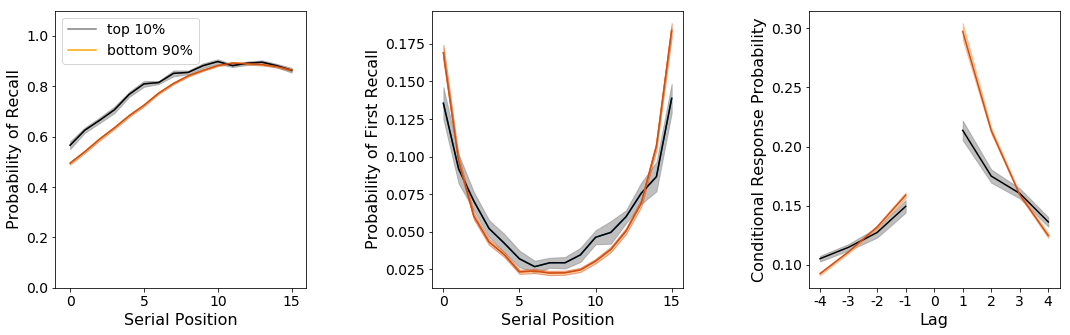

In [3]:
##### parameters
NUM = 171
percent = 90

gammas = np.random.uniform(0.3,0.6,NUM)
betas_enc = np.random.uniform(0.3,0.6,NUM)
betas_rec = np.random.uniform(0.3,0.6,NUM)
primacys = np.random.uniform(0.3,0.6,NUM)

# simulate primacy trials
acc, forward, contiguity, crp, spc, pfr,recalls = simulateData(primacys,betas_enc,betas_enc,gammas)

# plotting
plotting.plot_compare(percent,acc,gammas,primacys,crp,spc,pfr,recalls, NUM, "top 10%","bottom 90%","figureR_simulatePopulation.png")

### Generate patterns in Unsworth et al. (2011)

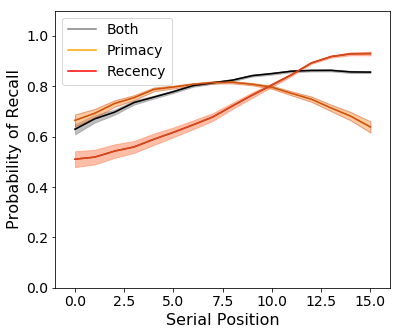

In [4]:
##### parameters
NUM = 50
beta_enc = 0.6
beta_rec = 1.0
# group 1
# optimal if beginning-of-list
gammas = np.random.uniform(0,0,NUM)
betas_enc = np.random.uniform(beta_enc,beta_enc,NUM)
betas_rec = np.random.uniform(beta_rec,beta_rec,NUM)
primacys = np.random.uniform(1,1,NUM)
acc, forward, contiguity, crp, spc1, pfr,recalls = simulateData(primacys,betas_enc,betas_enc,gammas)

# optimal if end-of-list
gammas = np.random.uniform(1,1,NUM)
betas_enc = np.random.uniform(beta_enc,beta_enc,NUM)
betas_rec = np.random.uniform(beta_rec,beta_rec,NUM)
primacys = np.random.uniform(0,0,NUM)
acc, forward, contiguity, crp, spc2, pfr,recalls = simulateData(primacys,betas_enc,betas_enc,gammas)

group1 = spc1 + spc2

# group 2
# not optimal if beginning-of-list
gammas = np.random.uniform(1,1,NUM)
betas_enc = np.random.uniform(beta_enc,beta_enc,NUM)
betas_rec = np.random.uniform(beta_rec,beta_rec,NUM)
primacys = np.random.uniform(1,1,NUM)
acc, forward, contiguity, crp, spc1, pfr,recalls = simulateData(primacys,betas_enc,betas_enc,gammas)

# optimal if end-of-list
gammas = np.random.uniform(1,1,NUM)
betas_enc = np.random.uniform(beta_enc,beta_enc,NUM)
betas_rec = np.random.uniform(beta_rec,beta_rec,NUM)
primacys = np.random.uniform(0,0,NUM)
acc, forward, contiguity, crp, spc2, pfr,recalls = simulateData(primacys,betas_enc,betas_enc,gammas)

group2 = spc1 + spc2

# group 3
# optimal if beginning-of-list
gammas = np.random.uniform(0,0,NUM)
betas_enc = np.random.uniform(beta_enc,beta_enc,NUM)
betas_rec = np.random.uniform(beta_rec,beta_rec,NUM)
primacys = np.random.uniform(1,1,NUM)
acc, forward, contiguity, crp, spc1, pfr,recalls = simulateData(primacys,betas_enc,betas_enc,gammas)
# not optimal if end-of-list
gammas = np.random.uniform(0,0,NUM)
betas_enc = np.random.uniform(beta_enc,beta_enc,NUM)
betas_rec = np.random.uniform(beta_rec,beta_rec,NUM)
primacys = np.random.uniform(0,0,NUM)
acc, forward, contiguity, crp, spc2, pfr,recalls = simulateData(primacys,betas_enc,betas_enc,gammas)
group3 = spc1 + spc2

plotting.plot_spc(group1, group2, group3, "figureR_Unsworth.png")